In [1]:
import numpy as np
import wandb
import lightning as L
from lightning.pytorch.loggers import WandbLogger

from lightning_modules import Base_Model, Hinton_Distillation, All_Connections_Distillation
from cifar_dataset import cifar10_loader
from cifar_tiny import Cifar_Tiny
from cifar_very_tiny import Cifar_Very_Tiny

## Данные

In [2]:
train_loader, test_loader = cifar10_loader(batch_size=128, maxsize=10112)

Files already downloaded and verified
Files already downloaded and verified


## Без Дистилляции

### Модель Tiny

In [3]:
for _ in range(3):
    with wandb.init() as run:
        wandb.log({
            "model_name": "tiny",
            "distillation_type": "without",
        })
        model = Base_Model(Cifar_Tiny(10))
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: potapuch2001. Use `wandb login --relogin` to force relogin


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntrop

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/iygcxtub/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/iygcxtub/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.0997421070933342     │
│         AUC_Noise         │    0.1818394809961319     │
│         test_acc          │    0.5946999788284302     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▃▄▄▅▅▅▅▆▆▇▇▆▇▇▆▇▇▇▇▇▇▇▇▇██████████████
train_loss,██▆▅▅▄▄▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.09974
AUC_Noise,0.18184
distillation_type,without
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/cm17dlvw/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/cm17dlvw/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.10196052491664886    │
│         AUC_Noise         │    0.19374999403953552    │
│         test_acc          │    0.5690000057220459     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▃▄▄▅▅▅▆▆▇▇▇▆▆▆▆▇█▇▇▇▆▇▇▇██████████████
train_loss,██▆▆▅▄▄▄▄▃▃▂▃▃▃▂▃▂▂▂▂▂▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.10196
AUC_Noise,0.19375
distillation_type,without
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Tiny       | 58.0 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
58.0 K    Trainable params
0         Non-trainable params
58.0 K    Total params
0.232     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/y67smuq0/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/y67smuq0/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.09877894818782806    │
│         AUC_Noise         │    0.18649210035800934    │
│         test_acc          │    0.5322999954223633     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▃▅▄▄▆▅▆▆▇▆▆▆▆▇▇▇▇▆▇▇██████████████████
train_loss,██▆▅▅▅▄▄▃▃▃▃▃▂▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.09878
AUC_Noise,0.18649
distillation_type,without
epoch,50


### Модель VeryTiny

In [4]:
for _ in range(3):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "without",
        })
        model = Base_Model(Cifar_Very_Tiny(10))
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/2p3xmlsb/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/2p3xmlsb/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.0824473649263382     │
│         AUC_Noise         │    0.18657894432544708    │
│         test_acc          │     0.51910001039505      │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▃▂▄▄▄▄▅▅▆▅▅▅▆▇▆▇▇▆█▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇███
train_loss,█▇▅▅▄▅▄▅▄▄▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▁▂▂▂▂▁▂▂▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.08245
AUC_Noise,0.18658
distillation_type,without
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/swsp9wvr/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/swsp9wvr/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.06767105311155319    │
│         AUC_Noise         │    0.17845000326633453    │
│         test_acc          │    0.49549999833106995    │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▁▃▃▃▄▄▄▄▅▅▆▅▅▅▅▅▆▆▆▆▇▇▅▇▆▆▇▇▇▆▆█▇▇▇▇██▇
train_loss,██▆▅▅▅▄▅▄▄▃▃▄▃▃▃▃▃▃▃▃▂▂▃▃▃▃▂▂▂▂▂▂▁▂▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.06767
AUC_Noise,0.17845
distillation_type,without
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | Cifar_Very_Tiny  | 15.1 K
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.060     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/5jmhr6x1/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/5jmhr6x1/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.0860000029206276     │
│         AUC_Noise         │    0.18606053292751312    │
│         test_acc          │    0.47040000557899475    │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▂▃▅▄▅▃▄▅▅▆▆▅▆▅▆▆▇▆▇▆▆▆▇▇▇▇▇▆▇▇▆█▇▇▇▇██
train_loss,█▇▆▆▄▅▄▆▄▃▃▃▃▃▃▃▃▃▂▃▂▂▃▃▂▂▂▂▂▂▁▂▂▂▂▂▂▁▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.086
AUC_Noise,0.18606
distillation_type,without
epoch,50


## Дистиляция Хинтона
Из Tiny в VeryTiny

In [5]:
for _ in range(3):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "hinton",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/shb6ih1b/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = Hinton_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/d684fbb1/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/d684fbb1/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.13166315853595734    │
│         AUC_Noise         │    0.18655000627040863    │
│         test_acc          │    0.5385000109672546     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▃▃▄▃▄▄▅▅▆▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▆▇▆▆▆▆▇▇▇▇▇█▇▇
train_loss,█▇▅▄▄▄▃▄▃▃▃▃▃▃▂▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▃▂▂▂▂▂▂▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.13166
AUC_Noise,0.18655
distillation_type,hinton
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/ce01tql5/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/ce01tql5/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.11988157778978348    │
│         AUC_Noise         │    0.17131052911281586    │
│         test_acc          │    0.42669999599456787    │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▃▄▅▄▄▅▅▆▆▆▅▅▆▅▇▆▆▇▇█▆▇▇▇▇▇▆▆▆▇▆▇▇▇▇██▇
train_loss,█▇▅▄▄▄▄▄▃▂▃▂▃▃▂▂▂▂▂▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.11988
AUC_Noise,0.17131
distillation_type,hinton
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/home/ganddalf/MIPT/Kafedra/Oleinik-BS-Thesis/code/lightning_modules/hinton.py:27: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/uxkd6n5i/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/uxkd6n5i/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.1207263171672821     │
│         AUC_Noise         │    0.17837895452976227    │
│         test_acc          │    0.5437999963760376     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▃▅▄▅▄▄▅▅▆▆▄▆▆▆▆▇▅▇▆▆▆▇▇▆▆▆▆▆▆▇▇▇▆▆█▇▇
train_loss,█▆▄▅▄▄▃▄▄▃▃▃▃▃▂▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.12073
AUC_Noise,0.17838
distillation_type,hinton
epoch,50


## Дистилляция междуслойная

In [6]:
coeffs_one_to_one = [1, 0, 0, 0,
                     0, 1, 0, 0,
                     0, 0, 1, 0,
                     0, 0, 0, 1]
coeffs_all_to_one = [0, 0, 1, 0,
                     0, 0, 1, 0,
                     0, 0, 1, 0,
                     0, 0, 1, 0]
coeffs_all_to_all = [1/4.0 for _ in range(16)]

def random_coeffs():
    coeffs = np.random.rand(16)
    coeffs = coeffs * 4 / sum(coeffs)
    return list(coeffs)

### По схеме "один к одному"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/mjtpope4/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/mjtpope4/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.17456315457820892    │
│         AUC_Noise         │    0.17349210381507874    │
│         test_acc          │    0.5802000164985657     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▅▅▄▆▅▆▆▆▆▆▆▆▆▆▇▇▇█▇▆▅▇▇▇▇▇▇▅▅▆▇▇▇▆██▇
train_loss,█▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.17456
AUC_Noise,0.17349
distillation_type,one_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/1uus8w4g/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/1uus8w4g/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.16674736142158508    │
│         AUC_Noise         │    0.17827367782592773    │
│         test_acc          │     0.578499972820282     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▅▅▅▆▅▆▆▆▇▇▆▇▇▆▇▇▆▇▇▇▇▇▆▇▇▆▇▆▆▇▇▇▇▇█▇▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.16675
AUC_Noise,0.17827
distillation_type,one_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/5desoxaq/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/5desoxaq/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.18339210748672485    │
│         AUC_Noise         │    0.17026053369045258    │
│         test_acc          │    0.5877000093460083     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▅▅▆▆▆▆▆▇▆▆▆▇▆▇▆▇▆█▇▆▇▇▇▇█▇▇▇▆▇▇▇▇▆██▇
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.18339
AUC_Noise,0.17026
distillation_type,one_to_one
epoch,50


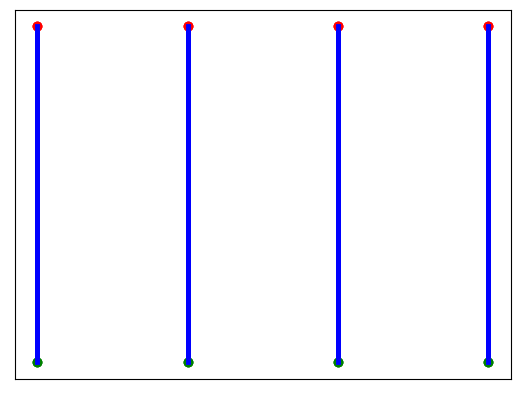

In [7]:
for _ in range(3):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "one_to_one",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/shb6ih1b/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_one_to_one)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### По схеме "все со всеми"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/f0gk648q/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/f0gk648q/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.22605526447296143    │
│         AUC_Noise         │    0.19469736516475677    │
│         test_acc          │    0.5903000235557556     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▄▅▄▆▅▅▅▆▇▆▇▆▆▇▇▇▇▆▇█▇▇▇█▇▇▇▇▇▆▇▇▇█▇▇██▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22606
AUC_Noise,0.1947
distillation_type,all_to_all
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/8sqkvj5u/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/8sqkvj5u/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23598946630954742    │
│         AUC_Noise         │    0.18253421783447266    │
│         test_acc          │    0.5853000283241272     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▅▅▅▅▆▇▇▇▆▆▆▇▆▇▆█▇▇▇▇▆▇▇▇▇▆▆▇▇▇▆▆█▇▇
train_loss,█▅▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23599
AUC_Noise,0.18253
distillation_type,all_to_all
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/4msmkyit/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/4msmkyit/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2229868471622467     │
│         AUC_Noise         │    0.16982895135879517    │
│         test_acc          │    0.5866000056266785     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▄▅▅▅▅▅▇▇▆▇▆▆▇▇▇▇▇█▇▇▇▇▇▇▇▇▆▆▇▇██▇▇█▇█
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22299
AUC_Noise,0.16983
distillation_type,all_to_all
epoch,50


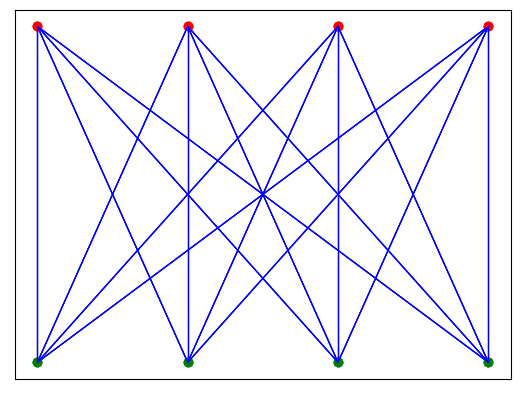

In [8]:
for _ in range(3):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "all_to_all",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/shb6ih1b/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_all_to_all)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### По схеме "все к одному" (к наибольшему слою учителя)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/zhhgffu1/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/zhhgffu1/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.22740788757801056    │
│         AUC_Noise         │    0.17148683965206146    │
│         test_acc          │    0.5740000009536743     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▃▅▅▆▆▅▇▇▆▆▆▆▇▇▇▇▇█▇▇▇▆▇▇▇▇▇▆▇▇▇▇▇▆██▇
train_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22741
AUC_Noise,0.17149
distillation_type,all_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/a6dw8xc4/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/a6dw8xc4/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.21926842629909515    │
│         AUC_Noise         │    0.18598420917987823    │
│         test_acc          │    0.5802000164985657     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▅▆▅▆▅▅▆▆▆▇▆▆▇▆▇▇▇▇▇▆▆▇▆▇▇▇▆▆▆▆▇▇▇▇█▇▆
train_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21927
AUC_Noise,0.18598
distillation_type,all_to_one
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/pidfy13z/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/pidfy13z/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.22127631306648254    │
│         AUC_Noise         │    0.1908368468284607     │
│         test_acc          │    0.5914000272750854     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▄▆▅▆▅▅▇▇▆▆▅▆▇▆▇▆▆▇▇▇▇▇▆▇█▇▇▆▆▇▇▇▇▇█▇█
train_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.22128
AUC_Noise,0.19084
distillation_type,all_to_one
epoch,50


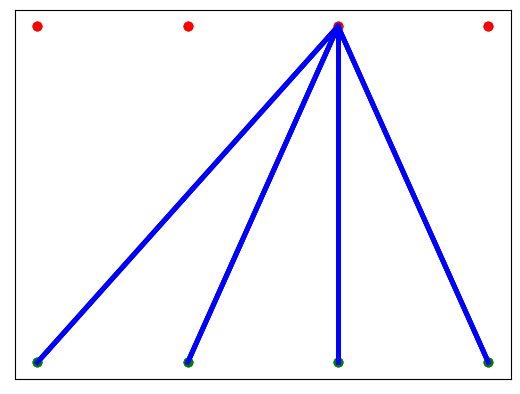

In [9]:
for _ in range(3):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "all_to_one",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/shb6ih1b/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=coeffs_all_to_one)
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)

### Со случайными коэффициентами

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/j5q21q6p/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/j5q21q6p/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.19866052269935608    │
│         AUC_Noise         │    0.16376052796840668    │
│         test_acc          │    0.5918999910354614     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▆▅▅▅▅▇▇▇▇▆▇▆▇▇█▇█▇▇▇█▇▇▇▇▇▇▇███▇▆██▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.19866
AUC_Noise,0.16376
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/w5j14kl6/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/w5j14kl6/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2187289446592331     │
│         AUC_Noise         │    0.19026315212249756    │
│         test_acc          │    0.5950000286102295     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▄▅▅▅▅▆▆▇▆▆▆▆▇▆▆█▇█▇▇▆▆▇▇▇▇▇▇▆▇▇█▇▆██▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21873
AUC_Noise,0.19026
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/mtcxgsjd/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/mtcxgsjd/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24164210259914398    │
│         AUC_Noise         │    0.1915999948978424     │
│         test_acc          │    0.5727999806404114     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▄▅▅▅▅▅▇▇▆▆▆▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▆▆▇▇█▇▇▇█▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24164
AUC_Noise,0.1916
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/b68cwx8q/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/b68cwx8q/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.21824736893177032    │
│         AUC_Noise         │    0.18796052038669586    │
│         test_acc          │    0.5810999870300293     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▄▃▅▅▅▅▅▇▇▆▆▆▇▇▇▇▆▆█▇▆▆▇▆▇▇▇▇▆▆▇▇▇▇▆█▇▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21825
AUC_Noise,0.18796
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/4g37d5r0/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/4g37d5r0/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2374657839536667     │
│         AUC_Noise         │    0.16959473490715027    │
│         test_acc          │    0.5587999820709229     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▃▅▃▄▄▄▆▇▆▆▆▆▆▆▆▇▆█▇▇▆▇▆▆▇▆▆▆▆▇▇█▇▆██▇
train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▁▁▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23747
AUC_Noise,0.16959
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/zgyv1al9/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/zgyv1al9/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.19258947670459747    │
│         AUC_Noise         │    0.18300789594650269    │
│         test_acc          │    0.5889000296592712     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▄▅▅▆▅▅▆▇▆▆▆▆▇▆▆▇▆▇▇▇▆▇▆▇▇▇▇▆▇▇▇▇▇▆█▇▆
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.19259
AUC_Noise,0.18301
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/z20mcmbj/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/z20mcmbj/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2194157838821411     │
│         AUC_Noise         │    0.1741657853126526     │
│         test_acc          │    0.5878999829292297     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▄▅▅▅▅▆▅▅▇▇▇▇▆▇▇▇▇▇▇█▇▆▇▇▇▇▇▇▇▆▆▇██▇▇██▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21942
AUC_Noise,0.17417
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/lx7bn2kj/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/lx7bn2kj/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.23424211144447327    │
│         AUC_Noise         │    0.1762000024318695     │
│         test_acc          │    0.5609999895095825     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▂▄▃▅▄▄▄▄▆▇▆▆▆▅▇▇▇▇▆▇▇▇▇▆▆▇█▆█▅▅▇▇█▆▆▇▇▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.23424
AUC_Noise,0.1762
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/fr7ncl40/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/fr7ncl40/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.2160789519548416     │
│         AUC_Noise         │    0.19081053137779236    │
│         test_acc          │     0.585099995136261     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▄▅▃▅▅▅▆▅▇▇▇▆▆▇▇▇▇█▇█▇▆▇▇▇▆▇▇▇▆▆▇▇█▇▆█▇█
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.21608
AUC_Noise,0.19081
distillation_type,random
epoch,50


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | student | Cifar_Very_Tiny  | 15.1 K
1 | teacher | Cifar_Tiny       | 58.0 K
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
15.1 K    Trainable params
58.0 K    Non-trainable params
73.0 K    Total params
0.292     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/home/ganddalf/miniconda3/envs/ml_dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/a6ywcaea/checkpoints/epoch=49-step=3950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/a6ywcaea/checkpoints/epoch=49-step=3950.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         AUC_FGSM          │    0.24077367782592773    │
│         AUC_Noise         │    0.1855078935623169     │
│         test_acc          │    0.5684000253677368     │
└───────────────────────────┴───────────────────────────┘

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


AUC_FGSM,▁
AUC_Noise,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_acc,▁
train_acc,▁▃▅▃▅▄▅▅▅▆▇▆▇▇▆▆▇▇▆▆██▇▆▇▆▇█▆▇▅▆▇▇▇▆▇██▇
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
AUC_FGSM,0.24077
AUC_Noise,0.18551
distillation_type,random
epoch,50


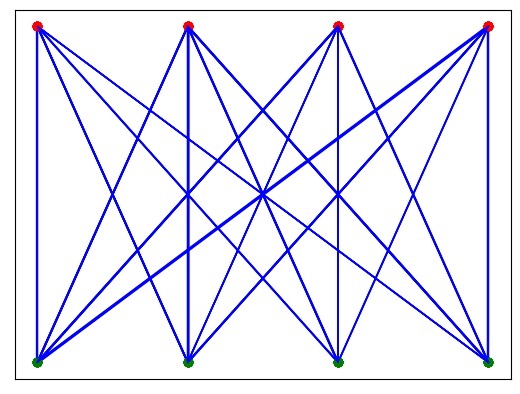

In [10]:
for _ in range(10):
    with wandb.init() as run:
        wandb.log({
            "model_name": "very_tiny",
            "distillation_type": "random",
        })
        teacher = Base_Model.load_from_checkpoint("./lightning_logs/shb6ih1b/checkpoints/epoch=99-step=7900.ckpt", model=Cifar_Tiny(10)).model
        model = All_Connections_Distillation(student=Cifar_Very_Tiny(10), teacher=teacher, coeffs=random_coeffs())
        trainer = L.Trainer(max_epochs=50, logger=WandbLogger(), inference_mode=False)
        trainer.fit(model=model, train_dataloaders=train_loader)
        trainer.test(dataloaders=test_loader)